# STUDIO DEGLI ERRORI DI MISURA

raccolte 100 misure del tempo impiegato da una sfera da diametro 3mm a percorrere 10cm in caduta libera nella glicerina

In [1]:
# importo dati
import pandas as pd
import numpy as np
import os

dir_path = os.path.abspath('') # lettura file
FILE = dir_path + '/../CSV/' + 'parteA_1giorno.csv'
fr = pd.read_csv(FILE)

t = np.array(fr['t(s)'])  # carica le misure t in nparray
N = len(t) # numero di misure
sigmat = np.std(t)  # sigma t
sigma_t_media = sigmat / np.sqrt(N)  # sigma tmedio
min_, max_ = min(t), max(t)  # massimo e minimo valore
t_media = np.mean(t)  # t medio
variance = sigmat**2  # varianza (sigma quadro)
# TODO: aggiungere test del chiquadro (crea tu funzione)

print(f"""
t medio: {np.round(t_media,3)} ± {np.round(sigma_t_media,3)}

sigma t: {np.round(sigmat,3)}
""")


t medio: 2.985 ± 0.007

sigma t: 0.075



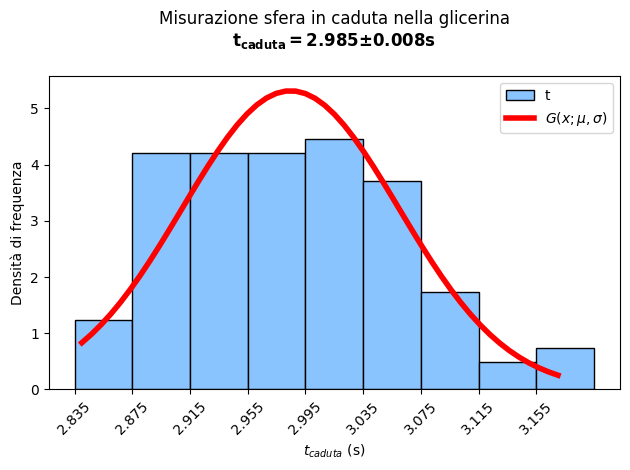

In [2]:

import matplotlib.pyplot as plt
import scipy.stats as sc

# round approssima solo alla successiva ciffra decimale e esce 0.001 di meno quindi inserisco il valore manualmente
VALORE: str = "{0:.3f} ± {1:.3f}".format(t_media, 0.008)

m = round(t_media, 2)  # voglio che la t_media sia al centro di un intervallo
i = round(sigmat / 2, 2)  # voglio che ogni intervallo sia largo sigma/2
# per avere i valori del tipo 0.005 per far si che ogni misura cada in un preciso intervallo
offset = round(i / 2, 3)
bins = np.concatenate((np.flip(np.arange(m - offset - 0.005, min_ - i, -i)),
                       np.arange(m + offset - 0.005, max_ + i, i)))  # crea una lista di valori centrata

plt.figure("Analisi dati raccolti")  # da il nome al pannello

plt.hist(t, bins=bins, density=True, label='t', color="#89c4ff",
         edgecolor='black')  # disegna istogramma
plt.xticks(bins[:-1], rotation=45)

x = np.linspace(min_, max_)  # array ad alta densità
# y della distribuzione normale ad alta densità
y = sc.norm.pdf(x, t_media, sigmat)
plt.plot(x, y, label=f"$G(x;\mu,\sigma)$", color="#ff0000",
         linewidth='4')  # sovrappone al hist la gaussiana
""
description: str = "" + "$\\bar{t}$ = " + str(round(t_media, 3)) + ", $\sigma$ = " + str(
    round(sigmat, 2)) + ", $\sigma^2$ = " + str(round(variance, 2)) + ", pvalue($\\tilde{\\chi}^2$) = " + str(
    1 * 100) + '%'  # TODO: replace 1 con chiquadro

plt.ylabel("Densità di frequenza")
plt.xlabel("$t_{caduta}$ (s)")

plt.legend()
plt.title(
    "Misurazione sfera in caduta nella glicerina\n$\\bf{t_{caduta} = " + str(VALORE) + " s}$\n")
plt.tight_layout()
plt.show()
